<a href="https://colab.research.google.com/github/Abhiboii/AirBnb-Booking-Analysis-EDA-Project/blob/main/AirBnb_EDA_Project_Abhi_Chaudhary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **Airbnb** **booking** **analysis**
#                  **EDA** **project**



# Represented by :- Abhi Chaudhary











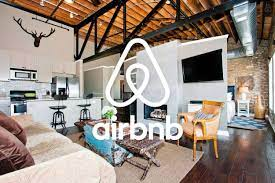

# **What is Airbnb?**
# Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.

Since 2008, Airbnb has helped travellers and hosts find new places to go and offer a more distinctive, personalised way to see the world. Today, Airbnb is a unique service that the entire globe uses and recognises. For the business, data analysis on the millions of listings offered through Airbnb is essential. These billions of listings generate a tonne of data, which can be analysed and used for a variety of purposes, including security, business decisions, understanding customer and provider (host) behaviour and performance on the platform, directing marketing initiatives, putting into practise cutting-edge extra services, and much more.
This dataset contains 16 columns with around 49,000 observations and a mixture of category and numerical variables.

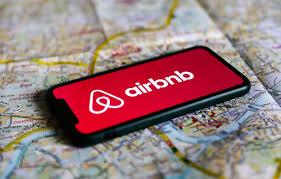

# ***Explore and analyze the data to discover key understandings (not limited to these) such as :***


*   Variation of price with neighbourhood
*   Number of night stayed versus type_of_room
*   Price versus reviews
*   Count Plot of various neighbourhood_group





**Github link -**

https://github.com/Abhiboii/AirBnb-Booking-Analysis-EDA-Project/blob/main/AirBnb_EDA_Project_Abhi_Chaudhary.ipynb


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Importing data file
df= pd.read_csv('/content/Airbnb NYC 2019.csv')

In [3]:
df=pd.DataFrame(df)

In [4]:
# Data calculation
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Dataset containing all the columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# Selecting the necessary columns from the dataset
new_df=df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','availability_365']]

In [7]:
#For getting the top 5 rows
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0


In [8]:
#null values in airbnb dataset
new_df.isnull().sum()

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
availability_365        0
dtype: int64

In [9]:
# Drop rows with missing values
new_df1 = new_df.dropna()

In [10]:
# Dataset Info
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   48858 non-null  int64 
 1   name                 48858 non-null  object
 2   host_id              48858 non-null  int64 
 3   host_name            48858 non-null  object
 4   neighbourhood_group  48858 non-null  object
 5   neighbourhood        48858 non-null  object
 6   room_type            48858 non-null  object
 7   price                48858 non-null  int64 
 8   minimum_nights       48858 non-null  int64 
 9   number_of_reviews    48858 non-null  int64 
 10  availability_365     48858 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.5+ MB


In [11]:
# Dataset Rows & Columns count
new_df.shape

(48895, 11)

# **Q.1-Which neighbourhood group is the most expensive one?**

In [12]:
# Most costly neighbourhood_group
grouped_1 = df.groupby('neighbourhood_group').mean()['price']

<ipython-input-12-2ef4041e52ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_1 = df.groupby('neighbourhood_group').mean()['price']


In [13]:
#Getting the output of the dataframe
print(grouped_1)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


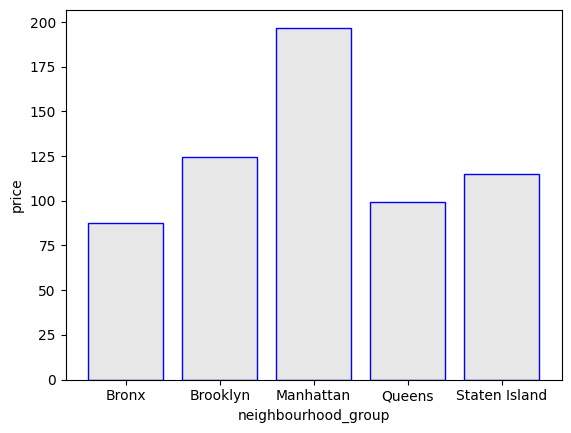

In [14]:
#visualization code
plt.bar(grouped_1.index, grouped_1.values,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.show()

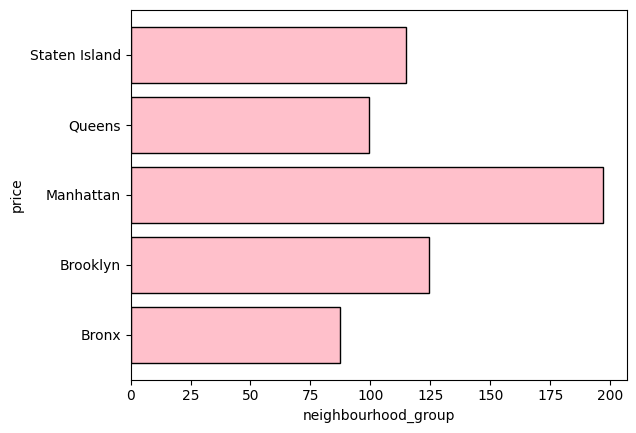

In [15]:
#visualization code
plt.barh(grouped_1.index, grouped_1.values,color=('pink'),  edgecolor='black')
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.show()

# # Manhattan is the most costly neighbourhood_group and Bronx is the cheapest .

# **Q.2-Which is the most traffic room type according to the minimum nights stayed?**

In [16]:
#Grouping the dataset
grouped_2 = df.groupby('room_type').count()['minimum_nights']

In [17]:
#Printing the dataset
print(grouped_2)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: minimum_nights, dtype: int64


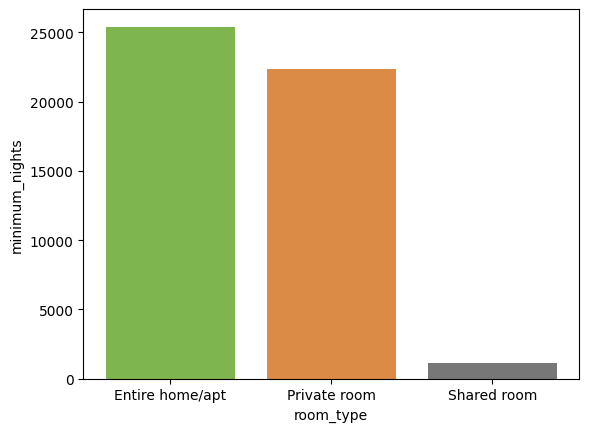

In [18]:
#visualization code
plt.bar(grouped_2.index, grouped_2.values,color=['#7eb54e','#db8b46','#777777'])

plt.xlabel('room_type')
plt.ylabel('minimum_nights')

plt.show()

# #When compared to a home or flat, those who choose to stay in a private room or shared room won't remain as long.

# **Q.3- Plot a graph to depict the choices that the vast majority of people prefer, as determined by reviews.**

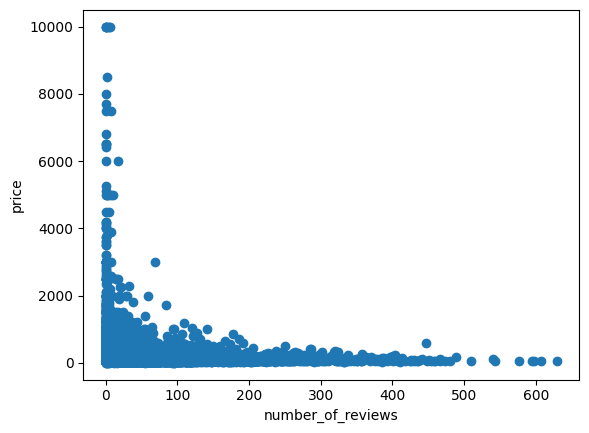

In [19]:
#Review of neighbourhood_group price wise
x=new_df1['number_of_reviews']
y=new_df1['price']
plt.scatter(x,y)
plt.xlabel('number_of_reviews')
plt.ylabel('price')

plt.show()


##  #This plot demonstrates that most individuals favour affordable housing because the majority of reviews are for areas in low price range.

# **Q.4-Which neighborhood_group receives the most traffic?**

In [20]:
#Framing the data on the basis of neighbourhood_group
grouped_3 = new_df1.groupby('neighbourhood_group').count().head()

In [21]:
#Getting the output of the data
print(grouped_3)

                        id   name  host_id  host_name  neighbourhood  \
neighbourhood_group                                                    
Bronx                 1089   1089     1089       1089           1089   
Brooklyn             20089  20089    20089      20089          20089   
Manhattan            21643  21643    21643      21643          21643   
Queens                5664   5664     5664       5664           5664   
Staten Island          373    373      373        373            373   

                     room_type  price  minimum_nights  number_of_reviews  \
neighbourhood_group                                                        
Bronx                     1089   1089            1089               1089   
Brooklyn                 20089  20089           20089              20089   
Manhattan                21643  21643           21643              21643   
Queens                    5664   5664            5664               5664   
Staten Island              373    373  

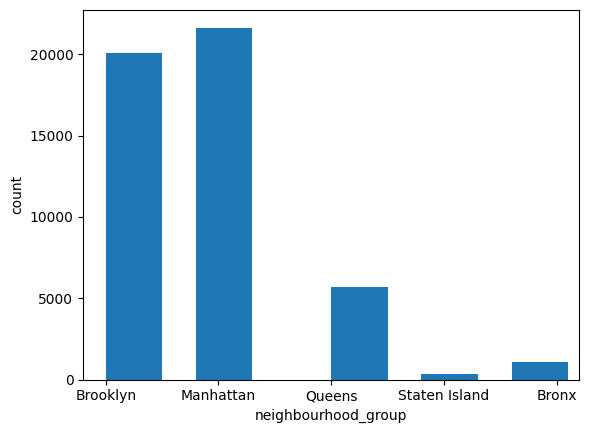

In [22]:
#visualization code for Q.4
plt.hist(new_df1['neighbourhood_group'],width=0.5,bins=10,align='mid')
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.show()

# #*Most visited places are near Manhattan neighbourhood*

#Q.5 The  price range of each neighbourhood group for every room type

In [23]:
# Mean price as per room type
mean_roomtype_price = df.replace(0, np.nan, inplace=False).groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
round(mean_roomtype_price,0)


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,128.0,67.0,60.0
Brooklyn,178.0,77.0,51.0
Manhattan,249.0,117.0,89.0
Queens,147.0,72.0,69.0
Staten Island,174.0,62.0,57.0


<ipython-input-25-e207a23b1617>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,400,50],minor = True )


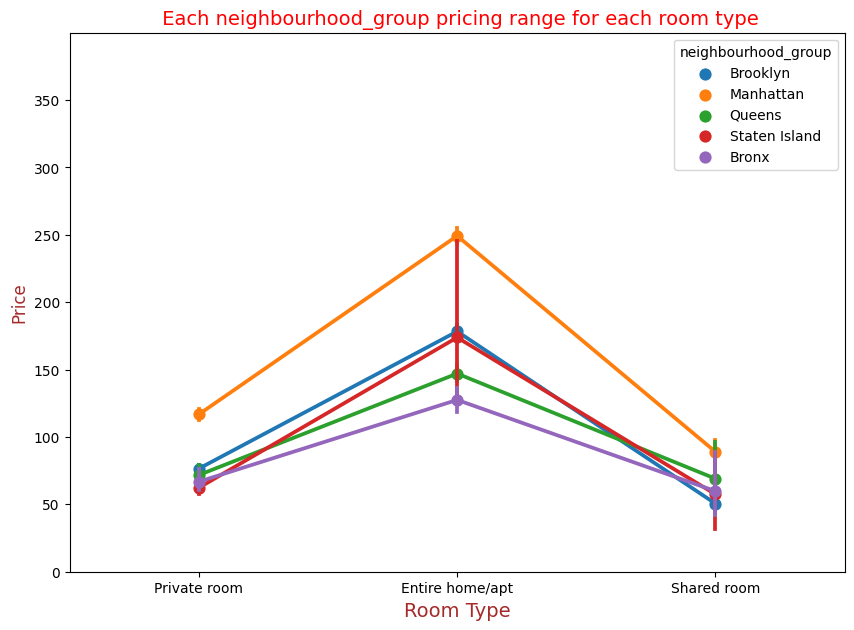

In [25]:
#visualization code
plt.figure(figsize = [10,7])

ax = sns.pointplot(data = new_df, x = 'room_type', y = 'price', hue = 'neighbourhood_group')
ax.set_yticklabels([0,400,50],minor = True )
plt.title(' Each neighbourhood_group pricing range for each room type', fontsize = 14, color ='red')
plt.xlabel('Room Type',fontsize = 14 , color = 'brown')
plt.ylabel('Price', fontsize = 12,color = 'brown' )
ax.set_ylim(0,400)
ax.set_yticks(range(0,400, 50))
plt.show()

# **➡ Conclusions :**


* Most visited places are near Manhattan neighbourhood
* Most individuals favour affordable housing because the majority of reviews are for areas in low price range.
* When compared to a home or flat, those who choose to stay in a private room or shared room won't remain as long.
* Manhattan is the most costly neighbourhood_group and Bronx is the cheapest .




*   Invest in a location that can be turned into a private room and rented out for roughly $60 per night.



*   Encourage customers to leave reviews by providing gift coupons or future discounts.
*  Try buying a plot in Manhattan, because it has the highest percentage of total nights spent.


*   Buying a house with the highest rent is also a smart alternative because it will attract the attention of many individuals with low rates.

*  It is best to avoid purchasing in the areas with the most listings because the market is already saturated with good offers.

*   Try price the property based on the determined averages.








